<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
RandomSearch - Keras - Neural Network
</b></font> </br></p>

---


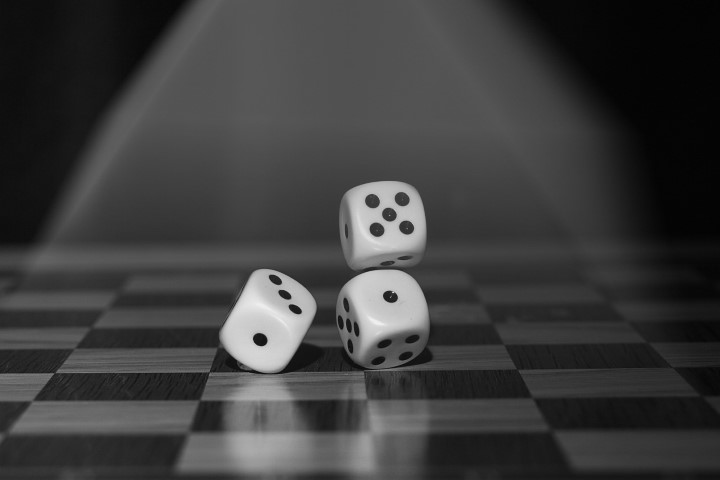

Bild von <a href="https://pixabay.com/de/users/955169-955169/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=1502706">955169</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=1502706">Pixabay</a>

# **1 <font color='orange'>|</font> Understand**
***


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Aufgabe verstehen</br>
✅ Daten sammeln</br>
✅ Statistische Analyse (Min, Max, Mean, Korrelation, ...)</br>
✅ Datenvisualisierung (Streudiagramm, Box-Plot, ...)</br>
✅ Prepare Schritte festlegen</br>

<p><font color='black' size="5">
Warnungen ausstellen
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

---
Regressionsanalyse auf einem synthetischen DataSet.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression

In [ ]:
X, y = make_regression(n_samples=200, n_features=2, noise=0.1)
data = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
target = pd.DataFrame(y, columns=['Target'])

In [ ]:
del X, y

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Pandas
</font></p>

In [ ]:
data.info()

In [ ]:
data.describe().T

# **2 <font color='orange'>|</font>  Prepare**

---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Nicht benötigte Features löschen</br>
✅ Datentyp ermitteln/ändern</br>
✅ Duplikate ermitteln/löschen</br>
✅ Missing Values behandeln</br>
✅ Ausreißer behandeln</br>
✅ Kategorischer Features codieren</br>
✅ Numerischer Features skalieren</br>
✅ Dimensionalität reduzieren</br>
✅ Datensampling (Over-/Undersampling)</br>
✅ Feature-Engineering (neue Features schaffen)</br>
✅ Pipeline erstellen/konfigurieren</br>

# **3 <font color='orange'>|</font> Modeling**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Train-Test-Split erstellen</br>
✅ Modellauswahl treffen</br>
✅ Pipeline erweitern/konfigurieren</br>
✅ Training durchführen</br>

<p><font size="5">
Train-Test-Split
</p>

In [ ]:
# entfällt aus Vereinfachung

<p><font size="5">
Modelauswahl & Training
</p>

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input

In [ ]:
try:
  import keras_tuner
except:
  !pip install -q keras_tuner
  import keras_tuner

In [ ]:
# Hyperparameter-Objekt erstellen
from keras_tuner import HyperParameters
hp = HyperParameters()
hp.Int('units', min_value=32, max_value=512, step=32)
hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

In [ ]:
# Funktion, um das Keras-Modell mit variablen Hyperparametern zu erstellen - notwendig für die Verwendung des keras-tuners
def build_model(hp):
    model = keras.Sequential()
    model.add(Input(shape=(2,)))  # Definieren des Input-Layers separat
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='mean_absolute_error')
    return model

# **4 <font color='orange'>|</font> Evaluate**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Prognose (Train, Test) erstellen</br>
✅ Modellgüte prüfen</br>
✅ Residuenanalyse erstellen</br>
✅ Feature Importance/Selektion prüfen</br>
✅ Robustheitstest erstellen</br>
✅ Modellinterpretation erstellen</br>
✅ Sensitivitätsanalyse erstellen</br>
✅ Kommunikation (Key Takeaways)</br>

<p><font size="5">
RandomSearch - Zufallssuche
</p>

In [ ]:
# Keras Tuner Initialisierung
from keras_tuner import RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_loss',  # Verwenden von 'val_loss' als Zielmetrik
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='keras_tuner_demo'
)

In [ ]:
# Tuner-Suche starten
tuner.search(data, target, epochs=10, validation_split=0.2)

In [ ]:
# Beste Modellparameter ausgeben
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Beste Anzahl von Units: {best_hp.get('units')}")
print(f"Beste Lernrate: {best_hp.get('learning_rate')}")

In [ ]:
tuner.search_space_summary()

In [ ]:
tuner.results_summary()

<p><font color='black' size="5">
Prognose auf Basis des besten Modells
</font></p>

In [ ]:
# Get the top 3 hyperparameters.
best_hps = tuner.get_best_hyperparameters(3)
# Build the model with the best hp.
best_model = build_model(best_hps[0])

In [ ]:
best_model.summary()

In [ ]:
target_pred = best_model.predict(data)

# **5. Deploy**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Modellexport und -speicherung</br>
✅ Abhängigkeiten und Umgebung</br>
✅ Sicherheit und Datenschutz</br>
✅ In die Produktion integrieren</br>
✅ Tests und Validierung</br>
✅ Dokumentation & Wartung</br>